<a href="https://colab.research.google.com/github/sameer333-lab/sameer/blob/main/used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **used-cars-price-prediction\**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [ ]:
car_price ='/content/drive/MyDrive/ ML/used-cars-price-prediction1.csv'

In [ ]:
df_ucpp = pd.read_csv(car_price)

In [ ]:
df_ucpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
df_ucpp.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df_ucpp.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
#Create an instance of the Linear Regression model
model = LinearRegression()


In [ ]:
X = df_ucpp [['Name', 'Location', 'Year', 'Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_Price']]
y = df_ucpp ['Price']  # Target variable


In [ ]:
# Preprocess categorical features using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#data type of this unique_location variable
unique_location = df_ucpp['Location'].unique()

In [ ]:
#converting the array to a list
unique_location_list=unique_location.tolist()


In [ ]:
# number of unique cities
len(unique_location_list)

11

In [ ]:
len(df_ucpp['Location'].unique())


11

In [ ]:
df_ucpp['New_Price'].isnull().sum()

5195

In [ ]:
# axis = 1 means its a column and axis = 0 means its a row, if inplace is false it will not update the main datafreame and for that we need to use another dataframe to store that previously updated dataframe
df2 = df_ucpp.drop(['New_Price'], axis=1, inplace=False)

In [ ]:
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
# if we pass true it will update the dataframe and save it inside
df_ucpp.drop(['New_Price'], axis = 1, inplace = True)


In [ ]:
df_ucpp.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75


In [ ]:
# now we have to drop thos unessesarry column 'Unnamed: 0'
df_ucpp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.5,3009.00,4513.50,6018.0
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [ ]:
df_ucpp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB


In [ ]:
unique_fuel = df_ucpp['Fuel_Type'].unique()


In [ ]:
unique_fuel_list=unique_fuel.tolist()
unique_fuel_list

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [ ]:
df_ucpp['Seats'].isnull().sum()

42

In [ ]:
#Clean and preprocess the data to make it suitable for the linear regression model. This may involve handling missing values, converting categorical variables to numerical representations, normalizing numerical features, and splitting the data into training and testing sets.


In [ ]:
# Handle missing values
df_ucpp= df_ucpp.dropna()

In [ ]:
# Convert categorical variables to numerical
df_ucpp= pd.get_dummies(df_ucpp)


In [ ]:
# Split the data into features and target variable
X = df_ucpp.drop('Kilometers_Driven', axis=1)
y = df_ucpp ['Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Instantiate a linear regression model, fit it to the training data, and make predictions on the test data.

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
#Evaluate the Model
#Assess the performance of the trained model by evaluating metrics such as mean squared error (MSE) and coefficient of determination (R-squared).

from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1.4552442237953545e-09
R-squared: 0.9999999999900036


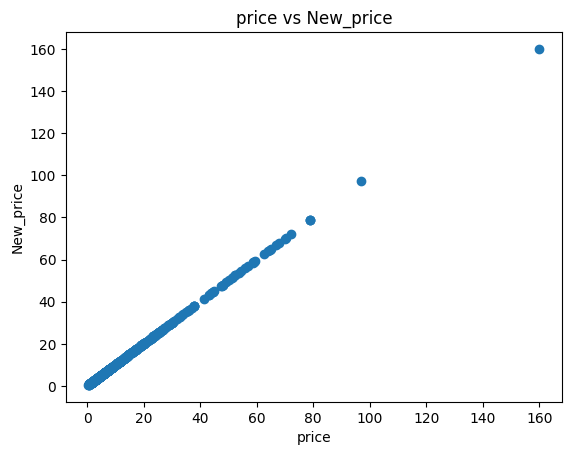

In [ ]:
#Visualize the predicted prices against the actual prices using scatter plots or other suitable visualizations to analyze the model's performance visually.
# Scatter plot of actual vs predicted prices
plt.scatter(y_test,y_pred)
plt.xlabel ('price')
plt.ylabel('New_price')
plt.title('price vs New_price')
plt.show()